In [1]:
%matplotlib inline
from scipy.misc     import imsave
from keras          import metrics
from PIL            import Image
from keras.models                      import Model
from keras.applications.vgg16          import VGG16
from keras.applications.vgg16          import decode_predictions
from keras.utils.np_utils              import to_categorical
import keras.backend     as K
import numpy             as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def limit_mem():
    cfg = K.tf.ConfigProto()
    cfg.gpu_options.allow_growth = True
    K.set_session(K.tf.Session(config = cfg))

In [28]:
limit_mem() #这一行非常重要！！！！！

In [5]:
def create_title(category, proba):
    return '"%s" %.1f%% confidence' % (category.replace('_', ' '), proba * 100)

In [6]:
def generate_title(model, array):
    prediction = model.predict(array)
    _, category, proba = decode_predictions(prediction)[0][0]
    
    return create_title(category, proba)

In [7]:
filename = '../images/brocoli.jpg'

In [8]:
original_pic   = Image.open(filename).resize((224, 224))
original_array = np.expand_dims(np.array(original_pic), 0)

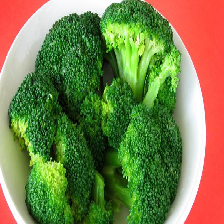

In [9]:
original_pic

In [10]:
imagenet_mean      = np.array([123.68, 116.779, 103.939], dtype = np.float32)
preprocess         = lambda x: (x - imagenet_mean)[:, :, :, ::-1]
deprocess          = lambda x: (x[:, :, :, ::-1] + imagenet_mean)
preprocessed_array = preprocess(original_array)
model              = VGG16()

553467904/553467096 [==============================] - 480s 1us/step


In [11]:
pred = model.predict(preprocessed_array)
print(*[p[1:] for p in decode_predictions(pred)[0]], sep = '\n')

40960/35363 [==================================] - 0s 10us/step
('broccoli', 0.99862087)
('zucchini', 0.0005660146)
('cauliflower', 0.00028594965)
('cucumber', 0.00016846447)
('mashed_potato', 7.190464e-05)


In [12]:
original_array

array([[[[253,  68,  63],
         [254,  69,  64],
         [254,  69,  64],
         ...,
         [255,  76,  69],
         [255,  76,  69],
         [255,  76,  69]],

        [[255,  71,  66],
         [253,  68,  63],
         [251,  66,  61],
         ...,
         [255,  76,  69],
         [255,  76,  69],
         [255,  76,  69]],

        [[255,  70,  65],
         [253,  68,  63],
         [252,  67,  62],
         ...,
         [255,  75,  68],
         [255,  75,  68],
         [255,  75,  68]],

        ...,

        [[254,  76,  72],
         [253,  78,  73],
         [253,  78,  75],
         ...,
         [253,  74,  69],
         [252,  73,  68],
         [253,  74,  69]],

        [[253,  75,  71],
         [253,  78,  73],
         [253,  78,  75],
         ...,
         [253,  74,  69],
         [252,  73,  68],
         [253,  74,  69]],

        [[252,  74,  70],
         [252,  77,  72],
         [254,  79,  76],
         ...,
         [254,  75,  70],
        

In [26]:
original_array.shape

(1, 224, 224, 3)

In [13]:
target_idx      = model.predict(original_array).argmax()

In [14]:
target_idx

937

In [15]:
target          = to_categorical(target_idx, 1000)

In [16]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
model.output

<tf.Tensor 'predictions/Softmax:0' shape=(?, 1000) dtype=float32>

In [17]:
target_variable = K.variable(target)
loss            = metrics.categorical_crossentropy(model.output, target_variable)
gradients       = K.gradients(loss, model.input)
get_grad_values = K.function([model.input], gradients)
grad_values     = get_grad_values([original_array])[0]

In [25]:
target_variable

<tf.Variable 'Variable:0' shape=(1000,) dtype=float32_ref>

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [18]:
grad_signs = np.sign(grad_values)

In [19]:
epsilon         = 4
perturbation    = grad_signs * epsilon
modified_array  = preprocessed_array + perturbation
deprocess_array = np.clip(deprocess(modified_array), 0., 255.).astype(np.uint8)

In [23]:
model.predict(modified_array).argmax()

46

In [20]:
title_original     = generate_title(model, preprocessed_array)
title_perturbation = generate_title(model, perturbation)
title_modified     = generate_title(model, modified_array)

In [21]:
plt.figure(figsize = (17, 17))
plt.subplot(1, 3, 1)
plt.imshow(original_array[0])
plt.title(title_original)
plt.subplot(1, 3, 2)
plt.imshow(perturbation[0])
plt.title(title_perturbation)
plt.subplot(1, 3, 3)
plt.imshow(deprocess_array[0])
plt.title(title_modified)

Text(0.5,1,'"green lizard" 21.9% confidence')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10c51f510> (for post_execute):


ValueError: Floating point image RGB values must be in the 0..1 range.

ValueError: Floating point image RGB values must be in the 0..1 range.

In [22]:
print('mean value of perturbation:', perturbation.mean())
pred = model.predict(modified_array)
print(*[p[1:] for p in decode_predictions(pred)[0]], sep = '\n')

mean value of perturbation: -0.029283589
('green_lizard', 0.21883817)
('African_chameleon', 0.21825063)
('green_snake', 0.17226298)
('American_chameleon', 0.15024212)
('zucchini', 0.042034198)
